<a href="https://colab.research.google.com/github/marquito3012/TFG/blob/main/FineTuningActionClassificatorYolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics roboflow

# Import YOLO library
from ultralytics import YOLO

# Import Roboflow
from roboflow import Roboflow

# Import OS
import os

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.7/914.7 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20

In [2]:
HOME = os.getcwd()
print(HOME)
!mkdir {HOME}/datasets
%cd {HOME}/datasets

# Download the dataset
rf = Roboflow(api_key="9KG8ovuhVxeymK6aMBor")
project = rf.workspace("uni-mallw").project("drowsy-detection-qnv9b")
version = project.version(3)
dataset = version.download("yolov11")

dataset_path = dataset.location  # Asegúrate de que esta variable tiene el path correcto

# Lista archivos dentro del dataset
print("Contenido del dataset:", os.listdir(dataset_path))

import shutil
import yaml

dataset_path = dataset.location  # Asegúrate de que esta variable contiene la ruta correcta
output_path = f"{HOME}/datasets/classification_dataset"

# Cargar data.yaml para obtener los nombres de las clases
with open(os.path.join(dataset_path, "data.yaml"), "r") as f:
    data = yaml.safe_load(f)
class_names = data["names"]

# Procesar train y valid
for split in ["train", "valid"]:
    split_path = os.path.join(dataset_path, split)
    images_path = os.path.join(split_path, "images")
    labels_path = os.path.join(split_path, "labels")

    # Crear carpeta de salida para clasificación
    split_output_path = os.path.join(output_path, split)
    os.makedirs(split_output_path, exist_ok=True)

    # Crear carpetas de clases
    for class_name in class_names:
        os.makedirs(os.path.join(split_output_path, class_name), exist_ok=True)

    # Mover imágenes a sus respectivas carpetas de clase
    for label_file in os.listdir(labels_path):
        img_name = label_file.replace(".txt", ".jpg")  # Ajustar si las imágenes son PNG
        img_path = os.path.join(images_path, img_name)

        with open(os.path.join(labels_path, label_file), "r") as f:
            lines = f.readlines()

        if lines:
            class_id = int(lines[0].split()[0])  # Tomamos la primera clase detectada
            class_name = class_names[class_id]

            # Copiar la imagen a su respectiva carpeta de clase
            shutil.copy(img_path, os.path.join(split_output_path, class_name, img_name))

print("✅ Conversión completada. Nuevo dataset en:", output_path)
%cd {HOME}

/content
/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Drowsy-Detection-3 in yolov11:: 100%|██████████| 3605/3605 [00:00<00:00, 3716.59it/s]


Contenido del dataset: ['valid', 'train', 'README.dataset.txt', 'data.yaml', 'README.roboflow.txt']
✅ Conversión completada. Nuevo dataset en: /content/datasets/classification_dataset
/content


In [4]:
# Train YOLOv8 on your dataset
model = YOLO("yolo11n-cls.pt")

train_results = model.train(
    data="/content/datasets/classification_dataset",  # Dataset path
    epochs=10,  # Adjust based on need
    batch=8   # Adjust based on GPU
)

Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolo11n-cls.pt, data=/content/datasets/classification_dataset, epochs=10, time=None, patience=100, batch=8, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

train: Scanning /content/datasets/classification_dataset/train... 1256 images, 0 corrupt: 100%|██████████| 1256/1256 [00:00<00:00, 4864.94it/s]

train: New cache created: /content/datasets/classification_dataset/train.cache



val: Scanning /content/datasets/classification_dataset/val... 538 images, 0 corrupt: 100%|██████████| 538/538 [00:00<00:00, 4783.85it/s]

val: New cache created: /content/datasets/classification_dataset/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to runs/classify/train2
Starting training for 10 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/10         0G     0.8608          8        224:   1%|          | 1/157 [00:00<01:44,  1.50it/s]

       1/10         0G     0.9494          8        224:   1%|▏         | 2/157 [00:01<01:29,  1.73it/s]
100%|██████████| 755k/755k [00:00<00:00, 12.2MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 34/34 [00:13<00:00,  2.47it/s]

                   all       0.73          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 34/34 [00:13<00:00,  2.49it/s]

                   all      0.745          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 34/34 [00:13<00:00,  2.47it/s]

                   all      0.829          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 34/34 [00:12<00:00,  2.81it/s]

                   all       0.79          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 34/34 [00:12<00:00,  2.62it/s]

                   all      0.851          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 34/34 [00:13<00:00,  2.45it/s]

                   all      0.851          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 34/34 [00:13<00:00,  2.48it/s]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 34/34 [00:14<00:00,  2.42it/s]

                   all      0.855          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 34/34 [00:13<00:00,  2.43it/s]

                   all      0.881          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10         0G     0.2858          8        224: 100%|██████████| 157/157 [01:15<00:00,  2.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 34/34 [00:13<00:00,  2.51it/s]

                   all      0.875          1



10 epochs completed in 0.254 hours.
Optimizer stripped from runs/classify/train2/weights/last.pt, 3.2MB
Optimizer stripped from runs/classify/train2/weights/best.pt, 3.2MB

Validating runs/classify/train2/weights/best.pt...
Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n-cls summary (fused): 112 layers, 1,528,586 parameters, 0 gradients, 3.2 GFLOPs
train: /content/datasets/classification_dataset/train... found 1256 images in 2 classes ✅ 
val: /content/datasets/classification_dataset/val... found 538 images in 2 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 34/34 [00:13<00:00,  2.61it/s]


                   all      0.881          1
Speed: 0.0ms preprocess, 15.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2


In [5]:
model.val()

Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n-cls summary (fused): 112 layers, 1,528,586 parameters, 0 gradients, 3.2 GFLOPs
train: /content/datasets/classification_dataset/train... found 1256 images in 2 classes ✅ 
val: /content/datasets/classification_dataset/val... found 538 images in 2 classes ✅ 
test: None...


val: Scanning /content/datasets/classification_dataset/val... 538 images, 0 corrupt: 100%|██████████| 538/538 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc:  65%|██████▍   | 44/68 [00:06<00:03,  6.33it/s]


KeyboardInterrupt: 

/content


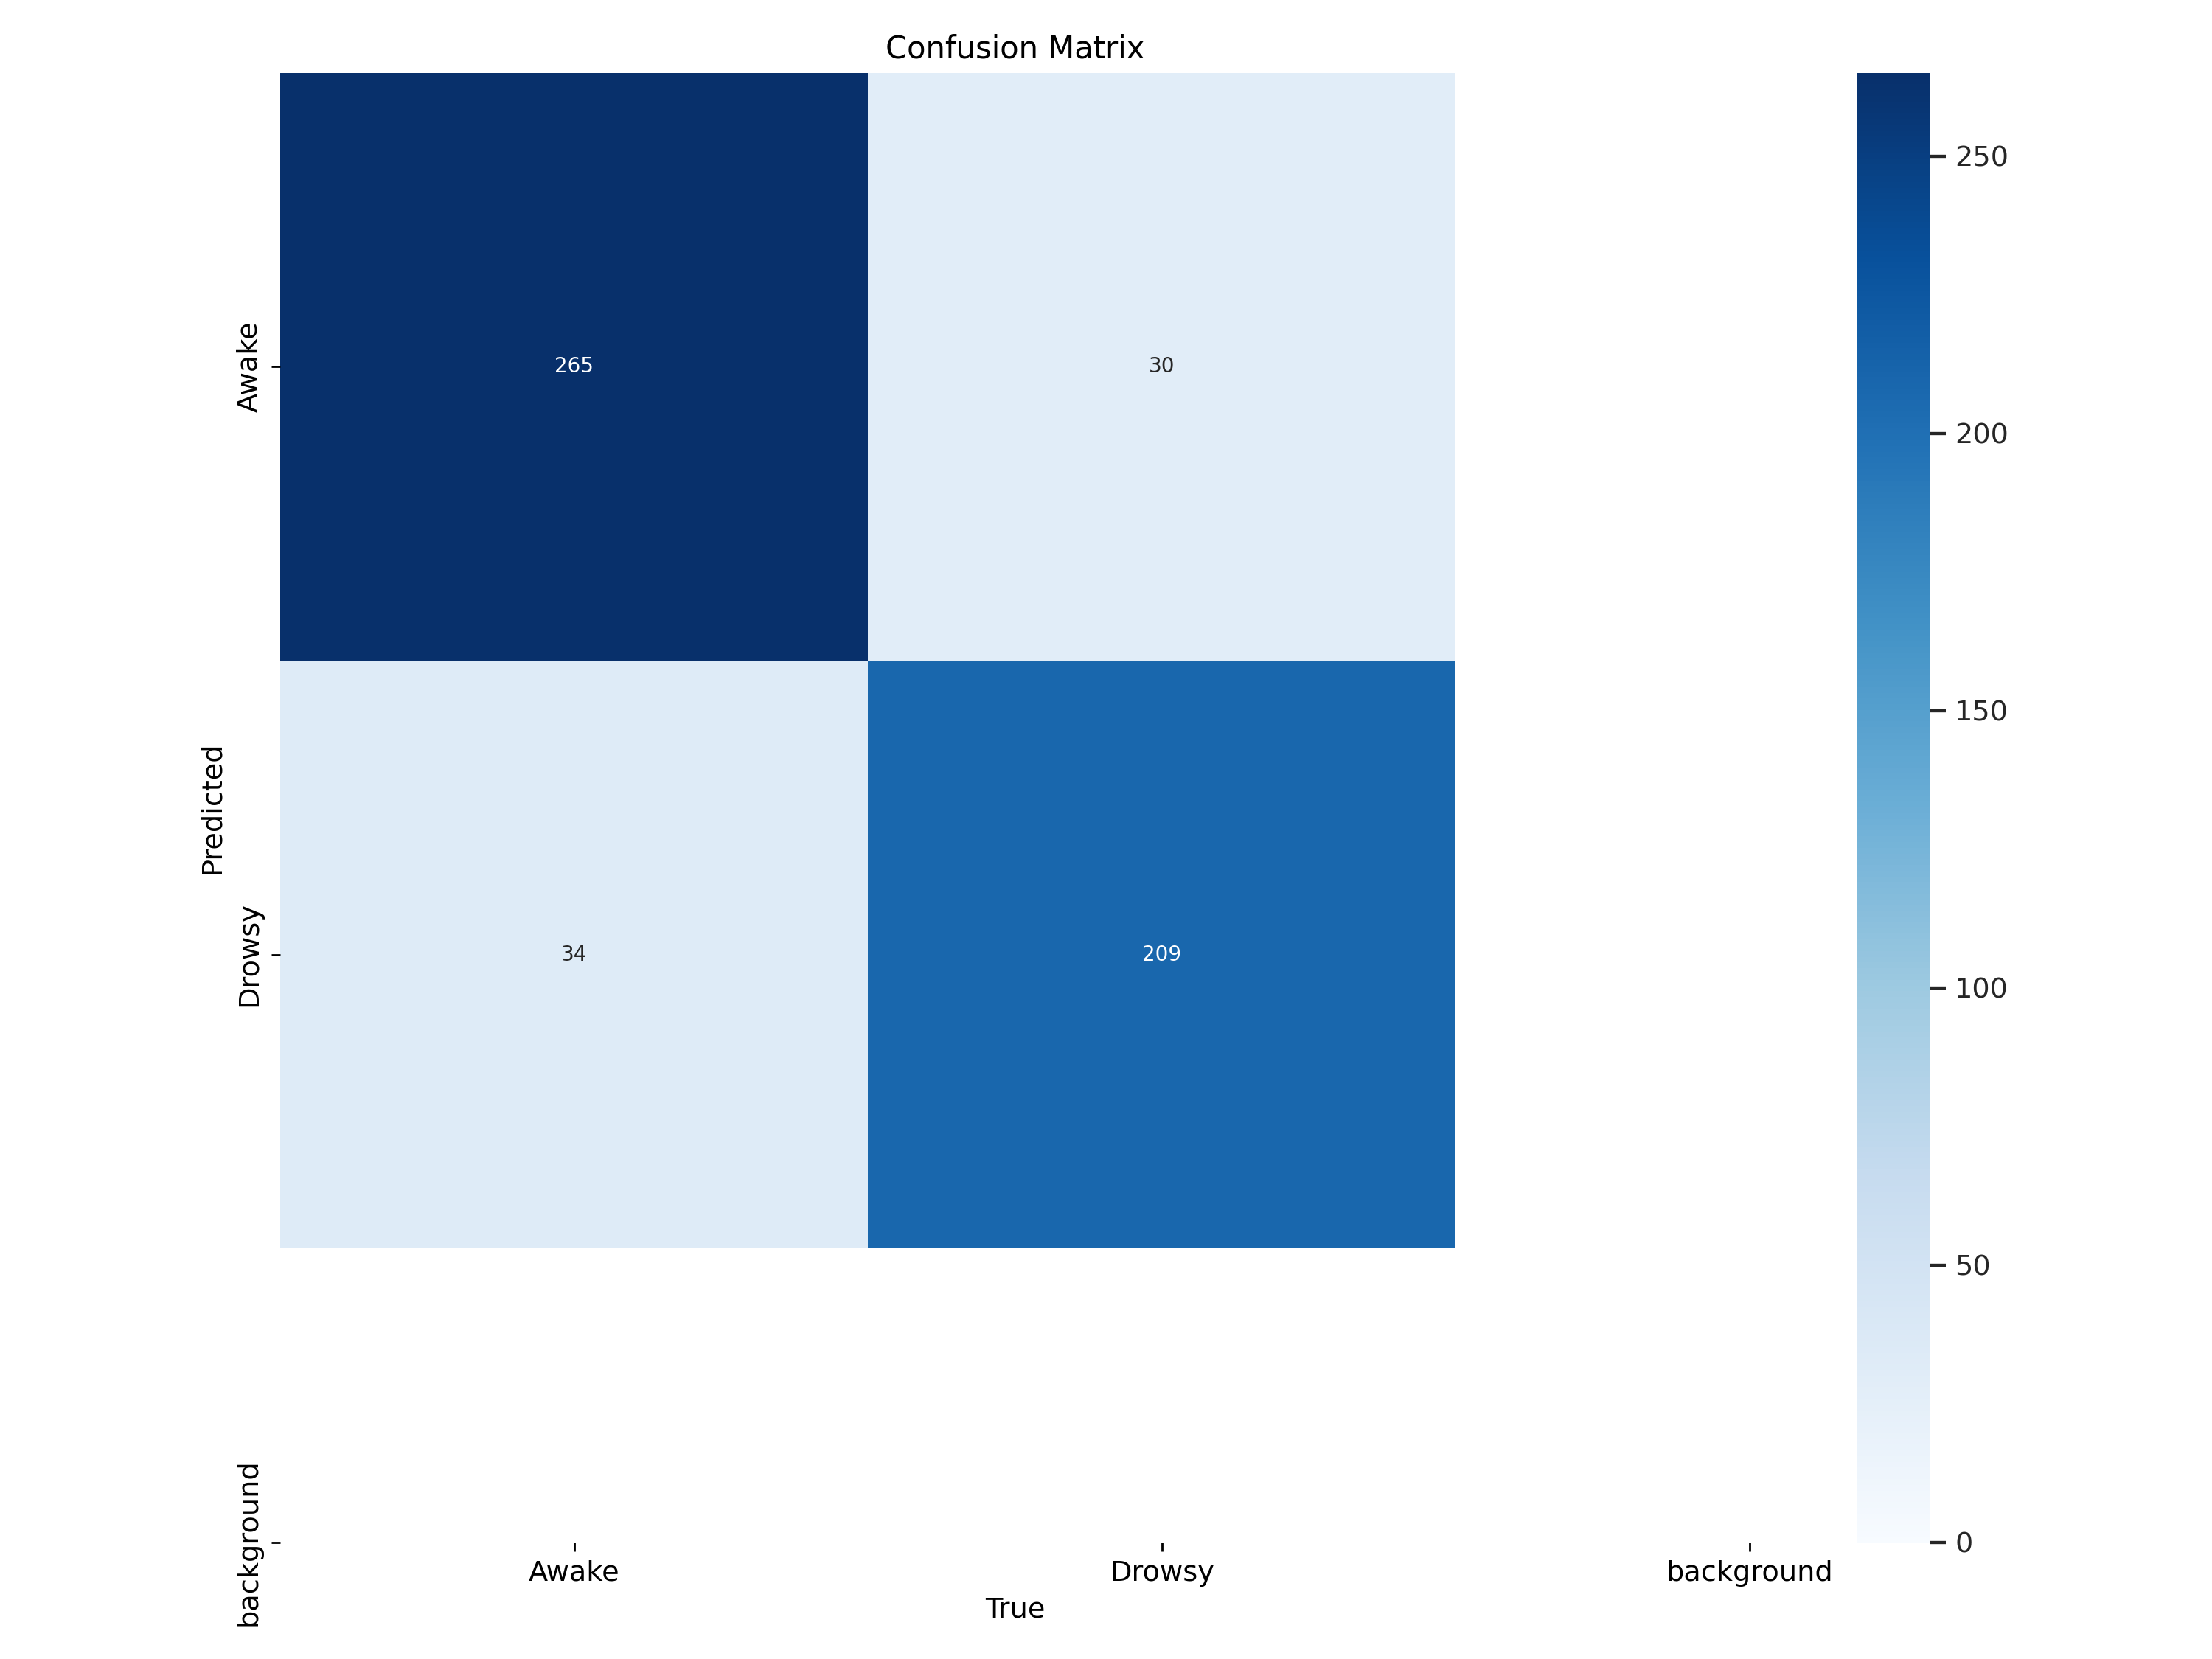

In [6]:
from IPython.display import Image, display
%cd {HOME}
Image(filename=f"{HOME}/runs/classify/train2/confusion_matrix.png", width=600)

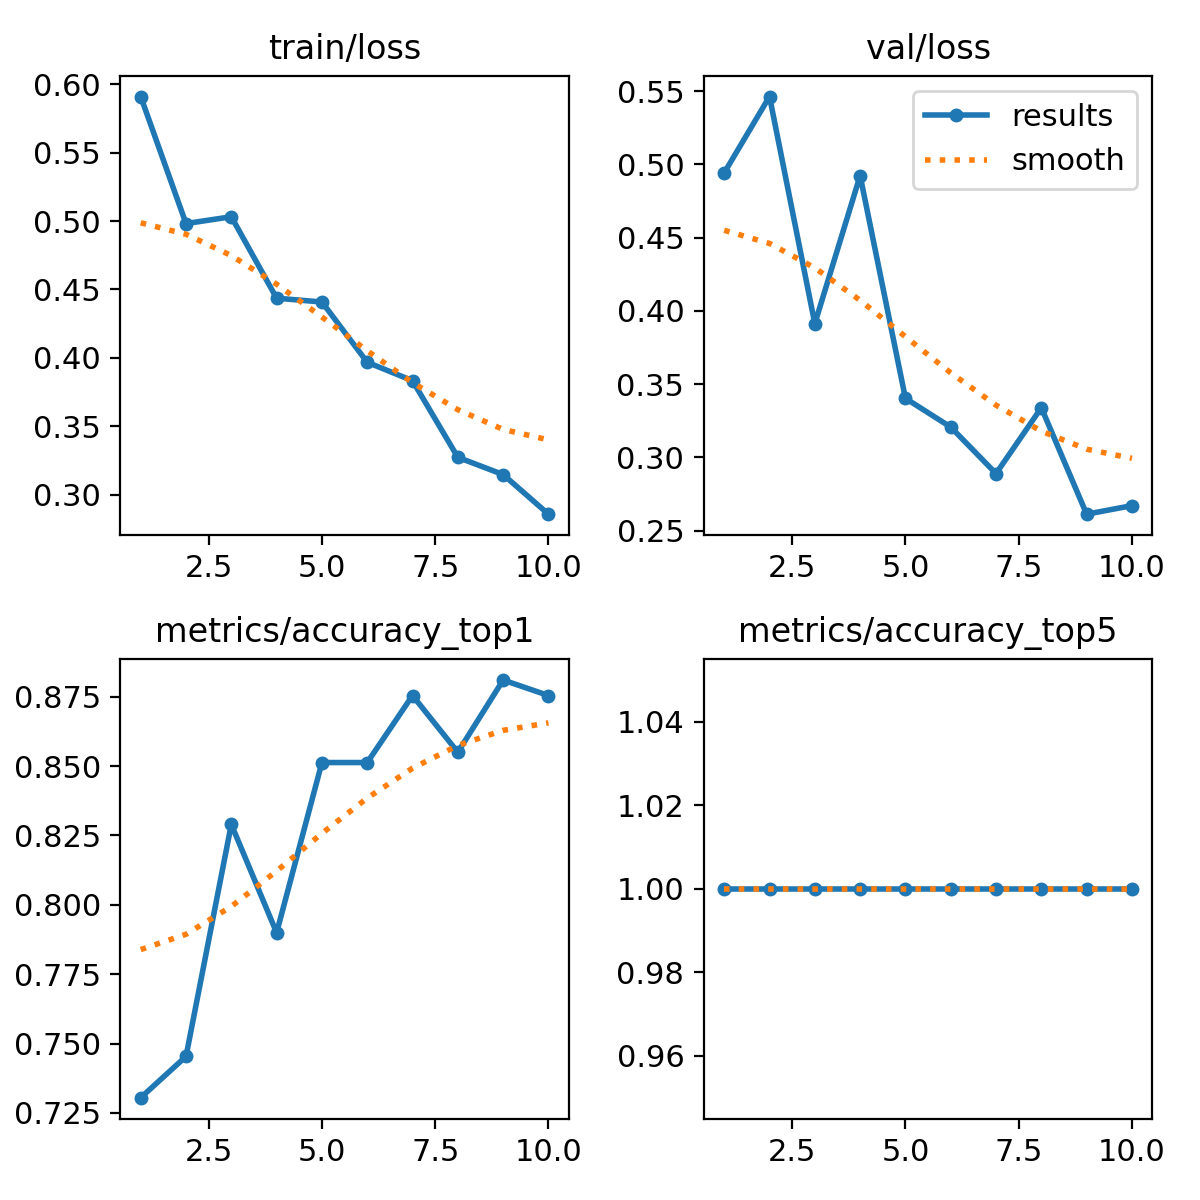

In [7]:
Image(filename=f"{HOME}/runs/classify/train2/results.png", width=600)